In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
# import shap
import string
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.special import inv_boxcox
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     GridSearchCV, RandomizedSearchCV)

from lightgbm.sklearn import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor



from utilidades.graficar import ver_dispersion
from utilidades.reducir_uso_memoria import reduce_mem_usage

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"
ruta_submits = "../submits"
ruta_features = ruta_data + "/features/"

In [4]:
def to_ascii(s):
    car_ascii = set(string.printable)
    return "".join([a for a in s if a in car_ascii])

train_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/train_limpio.csv"))
test_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/test_limpio.csv"))

train_limpio = train_limpio.drop(["dia"], axis=1)
test_limpio = test_limpio.drop(["dia"], axis=1)

poblacion_train = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_train.csv")
poblacion_test = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_test.csv")

train_limpio["poblacion"] = poblacion_train
test_limpio["poblacion"] = poblacion_test

train_limpio = train_limpio.rename(columns={col: to_ascii(col) for col in train_limpio.columns})
test_limpio = test_limpio.rename(columns={col: to_ascii(col) for col in test_limpio.columns})

id_zona_train = pd.read_csv(f"{ruta_data}/id_zona_train.csv")
id_zona_test = pd.read_csv(f"{ruta_data}/id_zona_test.csv")

train_limpio["idzona"] = id_zona_train["idzona"]
test_limpio["idzona"] = id_zona_test["idzona"]

In [5]:
tiene_terraza = pd.read_csv(f"{ruta_data}/features/tiene_terraza_train.csv")

train_limpio["tiene_terraza"] = tiene_terraza

tiene_terraza_tes = pd.read_csv(f"{ruta_data}/features/tiene_terraza_test.csv")

test_limpio["tiene_terraza"] = tiene_terraza_tes

tiene_jardin = pd.read_csv(f"{ruta_data}/features/tiene_jardin_train.csv")

train_limpio["tiene_jardin"] = tiene_jardin

tiene_jardin_tes = pd.read_csv(f"{ruta_data}/features/tiene_jardin_test.csv")

test_limpio["tiene_jardin"] = tiene_jardin_tes

tiene_servicio = pd.read_csv(f"{ruta_data}/features/tiene_servicio_train.csv")

train_limpio["tiene_servicio"] = tiene_servicio

tiene_servicio_tes = pd.read_csv(f"{ruta_data}/features/tiene_servicio_test.csv")

test_limpio["tiene_servicio"] = tiene_servicio_tes

tiene_vestidor = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_train.csv")

train_limpio["tiene_vestidor"] = tiene_vestidor

tiene_vestidor_tes = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_test.csv")

test_limpio["tiene_vestidor"] = tiene_vestidor_tes

tiene_vista = pd.read_csv(f"{ruta_data}/features/tiene_vista_train.csv")

train_limpio["tiene_vista"] = tiene_vista

tiene_vista_tes = pd.read_csv(f"{ruta_data}/features/tiene_vista_test.csv")

test_limpio["tiene_vista"] = tiene_vista_tes

tiene_salon = pd.read_csv(f"{ruta_data}/features/tiene_salon_train.csv")

train_limpio["tiene_salon"] = tiene_salon

tiene_salon_tes = pd.read_csv(f"{ruta_data}/features/tiene_salon_test.csv")

test_limpio["tiene_salon"] = tiene_salon_tes

tiene_cuarto = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_train.csv")

train_limpio["tiene_cuarto"] = tiene_cuarto

tiene_cuarto_tes = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_test.csv")

test_limpio["tiene_cuarto"] = tiene_cuarto_tes

tiene_family = pd.read_csv(f"{ruta_data}/features/tiene_family_train.csv")

train_limpio["tiene_family"] = tiene_family

tiene_family_tes = pd.read_csv(f"{ruta_data}/features/tiene_family_test.csv")

test_limpio["tiene_family"] = tiene_family_tes

tiene_bosque = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_train.csv")

train_limpio["bosque_dir"] = tiene_bosque

tiene_bosque_tes = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_test.csv")

test_limpio["bosque_dir"] = tiene_bosque_tes

tiene_avenida = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_train.csv")

train_limpio["avenida_dir"] = tiene_avenida

tiene_avenida_tes = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_test.csv")

test_limpio["avenida_dir"] = tiene_avenida_tes

tiene_fuente = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_train.csv")

train_limpio["fuente_dir"] = tiene_fuente

tiene_fuente_tes = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_test.csv")

test_limpio["fuente_dir"] = tiene_fuente_tes

#Empeoro

# tiene_vis = pd.read_csv(f"{ruta_data}/features/tiene_vista_dir_train.csv")

# train_limpio["vis_dir"] = tiene_vis

tiene_golf = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_train.csv")

train_limpio["golf_dir"] = tiene_golf

tiene_golf_tes = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_test.csv")

test_limpio["golf_dir"] = tiene_golf_tes

In [6]:
tiene_hectarea = pd.read_csv(f"{ruta_data}/features/tiene_hectarea_train.csv")

train_limpio["tiene_hectarea"] = tiene_hectarea

tiene_hectarea_tes = pd.read_csv(f"{ruta_data}/features/tiene_hectarea_test.csv")

test_limpio["tiene_hectarea"] = tiene_hectarea_tes

tiene_torre = pd.read_csv(f"{ruta_data}/features/tiene_torre_train.csv")

train_limpio["tiene_torre"] = tiene_torre

tiene_torre_tes = pd.read_csv(f"{ruta_data}/features/tiene_torre_test.csv")

test_limpio["tiene_torre"] = tiene_torre_tes

In [7]:
score_tf_train = pd.read_csv(f"{ruta_data}/features/scores_tfidf_train.csv")

train_limpio["score_tfidf"] = score_tf_train

In [8]:
train = pd.read_csv(f"{ruta_data}/train.csv", usecols=["habitaciones","banos", "metrostotales", "metroscubiertos", "lat", "lng"])

In [9]:
train_limpio["habitaciones"] = train["habitaciones"]

train_limpio["banos"] = train["banos"]

train_limpio["metroscubiertos"] = train["metroscubiertos"]
train_limpio["metrostotales"] = train["metrostotales"]

train_limpio["lat"] = train["lat"]
train_limpio["lng"] = train["lng"]

In [10]:
train_limpio["suma_metros"] = train_limpio["metrostotales"] + train_limpio["metroscubiertos"]

In [11]:
X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=96969)

In [13]:
# y_train_pow, lam = stats.boxcox(y_train) Con el sqrt que viene funca mejor

In [36]:
%%time
reg = XGBRegressor(max_depth=20,
                   min_child_weight=0.01,
                   max_bin=10000,
                   eval_metric="mae",
                    num_round=10000,
                   eta=0.07,
                  colsample_bytree=0.6,
                  alpha=30,
                  booster="dart")
y_train_l = np.log(y_train)
reg.fit(X_train, y_train_l)
pred = reg.predict(X_test)
pred = np.exp(pred)

/home/julian/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 13min 2s, sys: 646 ms, total: 13min 3s
Wall time: 13min 6s


In [37]:
# 511439 con binning de antiguedades
# 510386 4k iteraciones, con ciudades y tfidf
# 510094 idem pero sacando acentos de las palabras
# 509717 con mas palabras en la consulta
# 
# 492296 con 16k iteraciones y lo de arriba
#554316 con QuantileRegression sin iters
# 478428 sin 
mean_absolute_error(y_test, pred)

527689.3274902344

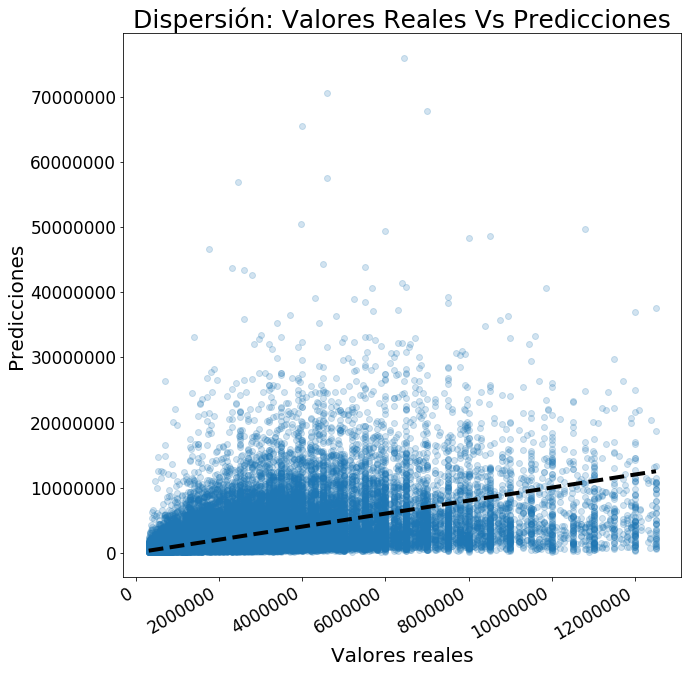

In [19]:
ver_dispersion(y_test, pred)

In [18]:
n_dimensiones = 300

In [19]:
desc_train = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_train_{n_dimensiones}d.csv")

In [20]:
desc_train = reduce_mem_usage(desc_train)

In [21]:
tit_train = pd.read_csv(f"{ruta_data}/features/titulos_vectorizados_train_50d.csv")

In [22]:
# train_lim_des = pd.concat([train_limpio, desc_train], axis=1)

In [23]:
train_lim_des = pd.concat([train_limpio, desc_train, tit_train], axis=1)

In [24]:
X, y = train_lim_des.drop(["precio"], axis=1),train_lim_des["precio"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=96969)

#### Probar con 0.07 learning rate y 4k iter o con 0.01 learning rate y 16k iter

In [ ]:
%%time

d_train = lgb.Dataset(X_train, label= y_train, categorical_feature=["provincia",
                                                                    "tipodepropiedad",
                                                                    "ciudad",
                                                                    "tiene_terraza",
                                                                    "tiene_jardin",
                                                                    "tiene_servicio",
                                                                    "tiene_vestidor",
                                                                    "tiene_vista",
                                                                    "tiene_salon",
                                                                    "tiene_cuarto",
                                                                    "tiene_family",
                                                                    "bosque_dir",
                                                                    "avenida_dir",
                                                                    "fuente_dir",
                                                                    "golf_dir",
                                                                    "tiene_hectarea",
                                                                    "tiene_torre",
                                                                    "idzona"])

params = {"feature_fraction":0.5959853966635414,
          "lambda_l1":80.82894063964651,
          "learning_rate":0.05141681335686303,
          "max_bin":1000,
          "min_data_in_leaf":20,
          "num_iterations":16000,
          "num_leaves":250,
          "reg_sqrt":True
}

reg = lgb.train(params,d_train)
pred = reg.predict(X_test)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/julian/.local/lib/python3.7/site-packages/lightgbm/basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [ ]:
# 471 con feature hashing de descripciones sin bigramas
mean_absolute_error(y_test, pred)

In [ ]:
ver_dispersion(y_test, pred)

---

In [37]:
%%time

d_train = lgb.Dataset(X_train, label= y_train, categorical_feature=["provincia",
                                                                    "tipodepropiedad",
                                                                    "ciudad",
                                                                    "tiene_terraza",
                                                                    "tiene_jardin",
                                                                    "tiene_servicio",
                                                                    "tiene_vestidor",
                                                                    "tiene_vista",
                                                                    "tiene_salon",
                                                                    "tiene_cuarto",
                                                                    "tiene_family",
                                                                    "bosque_dir",
                                                                    "avenida_dir",
                                                                    "fuente_dir",
                                                                    "golf_dir",
                                                                    "tiene_hectarea",
                                                                    "tiene_torre",
                                                                    "idzona"])

params = {"feature_fraction":0.5959853966635414,
          "lambda_l1":80.82894063964651,
          "learning_rate":0.03141681335686303,
          "max_bin":1000,
          "min_data_in_leaf":20,
          "num_iterations":16000,
          "num_leaves":250,
          "reg_sqrt":True
}

reg = lgb.train(params,d_train)
pred = reg.predict(X_test)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/julian/.local/lib/python3.7/site-packages/lightgbm/basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


CPU times: user 1h 1min 53s, sys: 57.9 s, total: 1h 2min 51s
Wall time: 40min 23s


In [38]:
# 471 con feature hashing de descripciones sin bigramas
mean_absolute_error(y_test, pred)

476951.00342630834

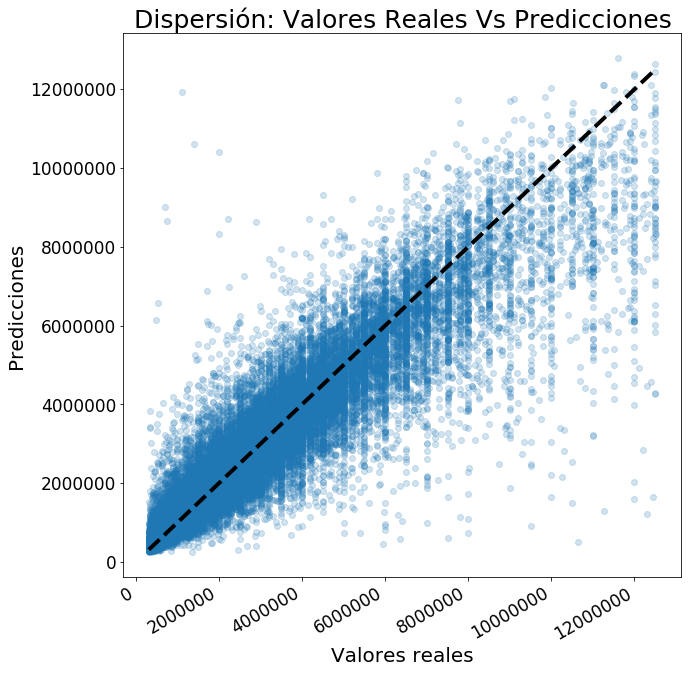

In [25]:
ver_dispersion(y_test, pred)

---

In [ ]:
%%time

d_train = lgb.Dataset(X_train, label= y_train, categorical_feature=["provincia",
                                                                    "tipodepropiedad",
                                                                    "ciudad",
                                                                    "tiene_terraza",
                                                                    "tiene_jardin",
                                                                    "tiene_servicio",
                                                                    "tiene_vestidor",
                                                                    "tiene_vista",
                                                                    "tiene_salon",
                                                                    "tiene_cuarto",
                                                                    "tiene_family",
                                                                    "bosque_dir",
                                                                    "avenida_dir",
                                                                    "fuente_dir",
                                                                    "golf_dir",
                                                                    "tiene_hectarea",
                                                                    "tiene_torre",
                                                                    "idzona"])

params = {"feature_fraction":0.5959853966635414,
          "lambda_l1":80.82894063964651,
          "learning_rate":0.01141681335686303,
          "max_bin":1000,
          "min_data_in_leaf":20,
          "num_iterations":16000,
          "num_leaves":250,
          "reg_sqrt":True
}

reg = lgb.train(params,d_train)
pred = reg.predict(X_test)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/julian/.local/lib/python3.7/site-packages/lightgbm/basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [27]:
# 471 con feature hashing de descripciones sin bigramas
mean_absolute_error(y_test, pred)

452614.6850787901

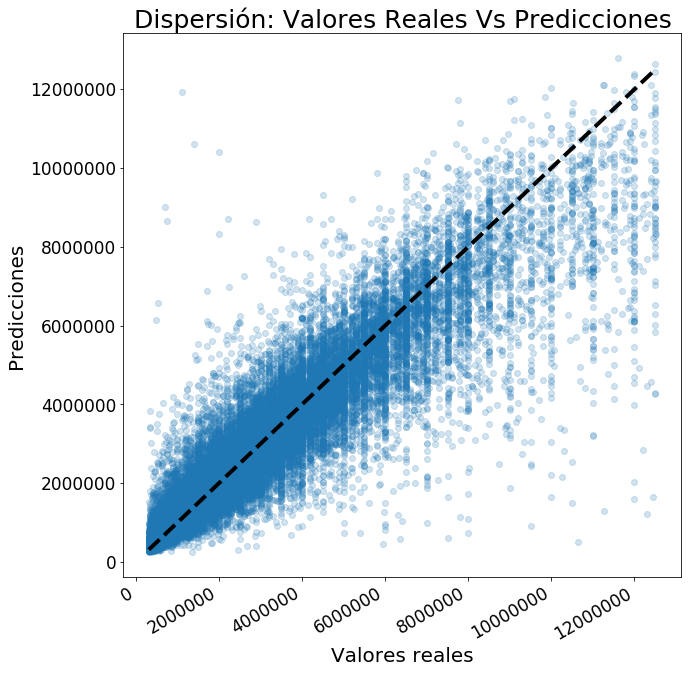

In [28]:
ver_dispersion(y_test, pred)